# Problem statement

#In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

#For many incumbent operators, retaining high profitable customers is the number one business goal.

#To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

#In this project, we analysed customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

# Importing Modules and Libraries

In [1]:
import pandas as pd 
import numpy as np
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from IPython.display import Markdown, display ,HTML

from sklearn.model_selection import train_test_split

sns.set(style="whitegrid")
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge
pd.options.display.float_format = '{:20,.2f}'.format # display float value with correct precision 

warnings.filterwarnings('ignore')

C:\Users\Adi\AppData\Local\Temp\ipykernel_30452\1766384162.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1) # make sure data and columns are displayed correctly withput purge


In [2]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score,roc_curve, recall_score

# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

#Improting the PCA module
from sklearn.decomposition import PCA

# Importing required packages for visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import  graphviz

# Other sklearn packages
import sklearn.metrics as metrics
from sklearn.tree import DecisionTreeClassifier

from datetime import date,datetime
import math
import multiprocessing

In [3]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [4]:
df=pd.read_csv(r"C:\projects_anu\telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,Na

In [5]:
df.shape

(99999, 226)

In [6]:
df.info(verbose=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [7]:
#checking how the data is spread
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00","96,140.00","94,621.00","92,254.00","96,062.00",

In [8]:
# Creating column name list by types of columns
id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

In [9]:
# The number of columns in each list
print("--> ID cols: %d\n--> Date cols:%d\n--> Numeric cols:%d\n--> Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

--> ID cols: 2
--> Date cols:12
--> Numeric cols:204
--> Category cols:8


  **********************************************************************  

# DATA CLEANING

In [10]:
# Checking missing values percentages
pd.set_option('display.max_rows', None)
df_null = 100*df.isnull().sum()/len(df)


df_null.sort_values(ascending=False)

arpu_3g_6                                 74.85
night_pck_user_6                          74.85
total_rech_data_6                         74.85
arpu_2g_6                                 74.85
max_rech_data_6                           74.85
fb_user_6                                 74.85
av_rech_amt_data_6                        74.85
date_of_last_rech_data_6                  74.85
count_rech_2g_6                           74.85
count_rech_3g_6                           74.85
date_of_last_rech_data_7                  74.43
total_rech_data_7                         74.43
fb_user_7                                 74.43
max_rech_data_7                           74.43
night_pck_user_7                          74.43
count_rech_2g_7                           74.43
av_rech_amt_data_7                        74.43
arpu_2g_7                                 74.43
count_rech_3g_7                           74.43
arpu_3g_7                                 74.43
total_rech_data_9                       

There are columns with 74.85 % of missing values. So we consider 70% as threshold value and remove the columns having missing values more than 70%.

In [11]:
# Null columns list
Missing_Vals_Column_70=list(df_null.index[df_null > 70])
(Missing_Vals_Column_70)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

Columns related to Max_recharge, total_recharge data and avg recharge amount data can be retained as these columns might provide us with some insight.

In [12]:
# Removing the columns as per above condition
Missing_Vals_Column_70=df.columns[round(100*df.isnull().sum()/len(df),2)> 70]
data_col=['max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9','total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']
Missing_Vals_Column_70=[col for col in Missing_Vals_Column_70 if col not in data_col]
df=df.drop(Missing_Vals_Column_70,axis=1)
df.shape

(99999, 198)

We see from above the values for recharge columns nearly are consistent with each other, also as the minimum value is 1 we can impute the NA values by 0, meaning that there was no recharge done by the customer.


In [13]:
#Let's impute 0 in recharge columns
zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9'
       ]

In [14]:
# Now impute missing values with 0
df[zero_impute_rch] = df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [15]:
print(df[zero_impute_rch].isnull().sum()*100/df.shape[1])

total_rech_data_6                    0.00
total_rech_data_7                    0.00
total_rech_data_8                    0.00
total_rech_data_9                    0.00
av_rech_amt_data_6                   0.00
av_rech_amt_data_7                   0.00
av_rech_amt_data_8                   0.00
av_rech_amt_data_9                   0.00
max_rech_data_6                      0.00
max_rech_data_7                      0.00
max_rech_data_8                      0.00
max_rech_data_9                      0.00
dtype: float64


In [16]:
# Dropping the ID and Date columns as it would be not required. 


Dropping=id_cols + date_cols
initial_cols = df.shape[1]
Cols_to_drop=[col for col in Dropping if col in df.columns]
df=df.drop(Cols_to_drop,axis=1)
df.shape

(99999, 188)

**Now since the columns reamining with the null values are of duration for a Type of call made, So 0 would mean No call of that particular type was made by that customer.** 

In [17]:
# imputing the remaining null columns as 0. 
df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)


Some columns are with 0 standard deviation, dropping these columns would be a good approach.

In [18]:
# Dropping above 3 columns

df.drop(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou'],axis=1, inplace= True)

In [19]:
df.shape

(99999, 185)

In [20]:
## Counting the number unique values present in the columns.
def unique_nan(s):
    return s.nunique(dropna=False).sort_values(ascending=False)

In [21]:
unique_nan(df)

arpu_6                85681
arpu_7                85308
arpu_8                83615
arpu_9                79937
total_og_mou_7        40477
total_og_mou_6        40327
total_og_mou_8        40074
total_og_mou_9        39160
total_ic_mou_6        32247
total_ic_mou_7        32242
total_ic_mou_8        32128
total_ic_mou_9        31260
offnet_mou_6          31140
offnet_mou_7          31023
offnet_mou_8          30908
offnet_mou_9          30077
loc_ic_mou_6          28569
loc_ic_mou_7          28390
loc_ic_mou_8          28200
std_og_mou_7          27951
loc_ic_mou_9          27697
std_og_mou_6          27502
std_og_mou_8          27491
std_og_mou_9          26553
loc_og_mou_6          26372
loc_og_mou_7          26091
loc_og_mou_8          25990
loc_og_mou_9          25376
onnet_mou_7           24336
onnet_mou_6           24313
onnet_mou_8           24089
onnet_mou_9           23565
loc_ic_t2m_mou_6      22065
loc_ic_t2m_mou_7      21918
loc_ic_t2m_mou_8      21886
loc_ic_t2m_mou_9    

In [22]:
# Dropping columns with only 1 unique value
cols = []
for i in df.columns:
    if df[i].nunique() ==1:
        cols.append(i)
        
cols

df = df.drop(cols,1)
df.shape

(99999, 177)

In [23]:
df.isnull().sum()

arpu_6                0
arpu_7                0
arpu_8                0
arpu_9                0
onnet_mou_6           0
onnet_mou_7           0
onnet_mou_8           0
onnet_mou_9           0
offnet_mou_6          0
offnet_mou_7          0
offnet_mou_8          0
offnet_mou_9          0
roam_ic_mou_6         0
roam_ic_mou_7         0
roam_ic_mou_8         0
roam_ic_mou_9         0
roam_og_mou_6         0
roam_og_mou_7         0
roam_og_mou_8         0
roam_og_mou_9         0
loc_og_t2t_mou_6      0
loc_og_t2t_mou_7      0
loc_og_t2t_mou_8      0
loc_og_t2t_mou_9      0
loc_og_t2m_mou_6      0
loc_og_t2m_mou_7      0
loc_og_t2m_mou_8      0
loc_og_t2m_mou_9      0
loc_og_t2f_mou_6      0
loc_og_t2f_mou_7      0
loc_og_t2f_mou_8      0
loc_og_t2f_mou_9      0
loc_og_t2c_mou_6      0
loc_og_t2c_mou_7      0
loc_og_t2c_mou_8      0
loc_og_t2c_mou_9      0
loc_og_mou_6          0
loc_og_mou_7          0
loc_og_mou_8          0
loc_og_mou_9          0
std_og_t2t_mou_6      0
std_og_t2t_mou_7

Now there are no more missing values present in the data

## Data Preparation.

1.Creating column avg_recharge_6_7 by adding total recharge amount of 6 & 7 month, then take avg of sum.

In [24]:
# Get the index of null vals for both columns and verify if both matches 
# if the result is false it means all rows of total_rech_data and av_rech_amt_data has null at same rows.
res = df.total_rech_data_6[df.total_rech_data_6.isna()].index != df.av_rech_amt_data_6[df.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = df.total_rech_data_7[df.total_rech_data_7.isna()].index != df.av_rech_amt_data_7[df.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =df.total_rech_data_8[df.total_rech_data_8.isna()].index != df.av_rech_amt_data_8[df.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


So if total_rech_data is null then av_rech_amt_data is also null

In [25]:
df['avg_rech_6_7']=(df['total_rech_amt_6']+df['total_rech_amt_7'])/2

2. Defining High-value customers

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [26]:
#Finding 70th percentile for the new column

X=df['avg_rech_6_7'].quantile(0.7)
X

368.5

In [27]:
# filtering only the customers who have recharged more than X, termed as HIGH-VALUE Customers.

df=df[df['avg_rech_6_7'] >= X]
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00"
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.0

3. Checking if rows have any missing values

In [28]:
# counting the rows having more than 50% missing values.

Missing_rows=df[(df.isnull().sum(axis=1)) > (len(df.columns)//2)]
Missing_rows

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7


In [29]:
df.shape

(30011, 178)

4.Tagging the CHURNERS

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows:
1. Those who have not made any calls (either incoming or outgoing) 
2. Those who have not used mobile internet even once in the churn phase.

We'll use total_ic_mou_9, total_og_mou_9, vol_2g_mb_9, vol_3g_mb_9 columns to tag the curners.

In [30]:
df['Churn']= np.where((df['total_ic_mou_9']==0) & (df['total_og_mou_9']==0) & (df['vol_2g_mb_9']==0) & (df['vol_3g_mb_9']==0), 1, 0)

In [31]:
df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_6_7,Churn
7,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,0.00,453.43,567.16,325.91,0.00,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,0.00,308.63,447.38,162.28,0.00,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,0.00,4.30,23.29,12.01,0.00,49.89,31.76,49.14,0.00,6.66,20.08,16.68,0.00,60.86,75.14,77.84,0.00,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,0.00,217.56,221.49,121.19,0.00,152.16,101.46,39.53,0.00,427.88,355.23,188.04,0.00,36.89,11.83,30.39,0.00,91.44,126.99,141.33,0.00,52.19,34.24,22.21,0.00,180.54,173.08,193.94,0.00,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5.00,5.00,7.00,3.00,"1,580.00",790.00,"3,638.00",0.00,"1,580.00",790.00,"1,580.00",0.00,0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
8,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,

In [32]:
df['Churn'].value_counts()

0    27418
1    2593 
Name: Churn, dtype: int64

5. Removing all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [33]:
columns_9 = [col for col in df.columns.to_list() if '_9' in col]
print(columns_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [34]:
# Deleting the churn month columns

df = df.drop(columns_9, axis=1)

In [35]:
# Dropping sep_vbc_3g column

df = df.drop('sep_vbc_3g', axis=1)

6. Checking the imbalance

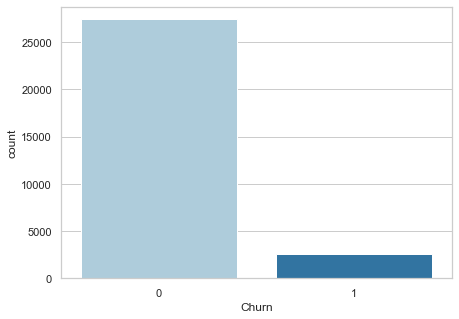

8.64

In [36]:
# Checking churn data
plt.figure(figsize= [7,5])
sns.countplot(df.Churn, palette= 'Paired', label=[1,0])
plt.show()
# Checking for the CHURN rate
round(100*(df['Churn'].mean()),2)

 8.6% customers have churned, indicating  class imbalance, it can be balanced using SMOTE.

# 7. Outlier Treatment

In [37]:
# Converting  Churn column to Object data type for Outlier Treatment.

df['Churn'] = df['Churn'].astype(object)

In [38]:
# Listing numeric columns only
num_cols = df.select_dtypes(exclude=['object']).columns
print(num_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avg_rech_6_7'],
      dtype='object', length=134)


In [39]:
df.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,587.28,589.14,534.86,296.03,304.34,267.60,417.93,423.92,375.02,17.41,13.52,13.26,29.32,22.04,21.47,94.68,95.73,87.14,181.28,181.27,167.59,6.98,7.10,6.49,1.57,1.86,1.71,282.95,284.11,261.23,189.75,199.88,172.20,203.10,213.41,179.57,2.01,2.03,1.79,394.87,415.33,353.56,2.26,2.21,2.03,5.92,7.43,6.89,0.69,0.05,0.06,686.70,709.12,623.77,68.75,70.31,65.94,159.61,160.81,153.63,15.60,16.51,14.71,243.97,247.64,234.28,16.23,16.89,15.05

In [40]:
# Removing outliers less than 10th and more than 90th percentile

for col in num_cols: 
    q1 = df[col].quantile(0.10)
    q3 = df[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    # Assigning the filtered dataset into new_DF
    df_1 = df.loc[(df[col] > range_low) & (df[col] < range_high)]

df_1.shape

(29700, 135)

## **Adding Some New Columns with some insights**

Adding **dec_rech_action**

Indicating if the nUmber of rechabrge for a customer when compared to good phase is decreased in action phase or not

In [41]:
# Avg recharge number at action phase
# We are taking average because there are two months(7 and 8) in action phase
df_1['avg_rech_num_action'] = (df_1['total_rech_num_7'] + df_1['total_rech_num_8'])/2
# Difference between total_rech_num_6 and avg_rech_action
df_1['diff_rech_num'] = df_1['avg_rech_num_action'] - df_1['total_rech_num_6']

In [42]:
# Checking if recharge number has decreased in action phase, 1=Yes, 0=No
df_1['dec_rech_action'] = np.where((df_1['diff_rech_num'] < 0), 1, 0)

In [43]:
df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53

Adding **dec_avg_revenuePC_action**

Indicating if average revenue per customer when compared to good phase is decreased in action phase or not

In [44]:
# average ARUP in action phase
# We are taking average because there are two months(7 and 8) in action phase
df_1['avg_arpu_action'] = (df_1['arpu_7'] + df_1['arpu_8'])/2
# Difference of good and action phase ARPU
df_1['diff_arpu'] = df_1['avg_arpu_action'] - df_1['arpu_6']

In [45]:
# Checking whether the arpu has decreased on the action month, 1=Yes, 0=No
df_1['dec_avg_revenuePC_action'] = np.where((df_1['diff_arpu'] < 0), 1, 0)

In [46]:
df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.0

Adding **dec_rech_amt_action**

Indicating if recharge amount of customers when compared to good phase is decreased in action phase or not

In [47]:
# Avg recharge amount in action phase

#  there are two months(7 and 8) in action phase
df_1['avg_rech_amt_action'] = (df_1['total_rech_amt_7'] + df_1['total_rech_amt_8'])/2

# Difference of action phase recharge amount and good phase recharge amount

df_1['diff_rech_amt'] = df_1['avg_rech_amt_action'] - df_1['total_rech_amt_6']

In [48]:
# Checking if recharge amount has decreased in action phase, 1=Yes, 0=No

df_1['dec_rech_amt_action'] = np.where((df_1['diff_rech_amt'] < 0), 1, 0) 

In [49]:
df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,3

Adding **dec_MOU_action**

Indicating if Minutes of Usages for the customers when compared to good phase is decreased in action phase or not

In [50]:
# Total mou at good phase incoming and outgoing

df_1['total_mou_good'] = (df_1['total_og_mou_6'] + df_1['total_ic_mou_6'])

# Avg. mou at action phase
# there are two months(7 and 8) in action phase

df_1['avg_mou_action'] = (df_1['total_og_mou_7'] + df_1['total_og_mou_8'] + df_1['total_ic_mou_7'] + df_1['total_ic_mou_8'])/2

# Difference avg_mou_good and avg_mou_action

df_1['diff_mou'] = df_1['avg_mou_action'] - df_1['total_mou_good']


In [51]:
# Checking whether the mou has decreased in action phase, 1=Yes, 0=No
df_1['dec_MOU_action'] = np.where((df_1['diff_mou'] < 0), 1, 0)

In [52]:
df_1.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avg_rech_6_7,Churn,avg_rech_num_action,diff_rech_num,dec_rech_action,avg_arpu_action,diff_arpu,dec_avg_revenuePC_action,avg_rech_amt_action,diff_rech_amt,dec_rech_amt_action,total_mou_good,avg_mou_action,diff_mou,dec_MOU_action
7,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,"1,580.00",790.00,"3,638.00","1,580.00",790.00,"1,580.00",0.00,0.00,779.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,"1,185.00",1,6.00,1.00,0,"2,260.66","1,191.48",0,"2,214.00",634.00,0,"1,113.99",973.09,-140.90,1
8,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,2.00,3.00,0.00,154.00,23.00,0.00,177.00,69.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,910.65,122.16,519.00,0,17.50,-1.50,1,314.79,-63.93,1,360.50,-76.50,1,612.22,324.12,-288.10,1
13,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.2

## EDA

Univariate Analysis

1.Churn rate on the basis whether the customer decreased  MOU in action month

In [53]:
# Converting churn column to int in order to do aggfunc in the pivot table

df_1['Churn'] = df_1['Churn'].astype('int64')

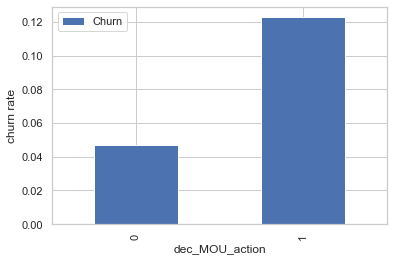

In [54]:
df_1.pivot_table(values='Churn', index='dec_MOU_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

 The churn rate is more for the customers whose mou decreased in the action phase than the good phase.

2.Churn rate on the basis of decrease in  amount of recharge in action month

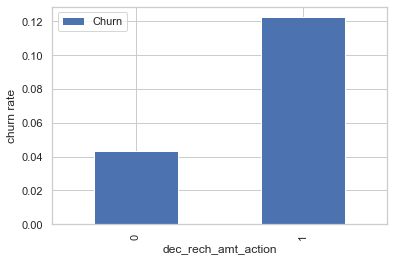

In [55]:
df_1.pivot_table(values='Churn', index='dec_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

3. Churn rate on the basis whether the customer decreased her/his number of recharge in action month

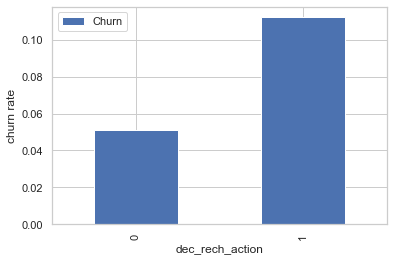

In [56]:
df_1.pivot_table(values='Churn', index='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn rate is more for the customers,number of recharge in the action phase is lesser than the number in good phase.
Thus the customers do not do the monthly recharge more when they are in the action phase.

Analysis of the  MOU in the action phase

In [57]:
# Creating churn dataframe

df_churn = df_1[df_1['Churn'] == 1]

# Creating not churn dataframe

df_Non_churn = df_1[df_1['Churn'] == 0]

[Text(0.5, 0, 'Action phase MOU')]

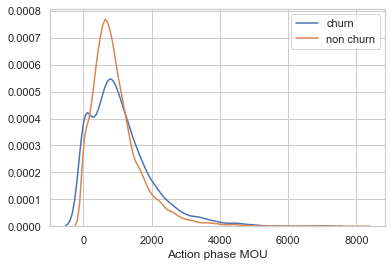

In [58]:
# Distribution plot

ax = sns.distplot(df_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(df_Non_churn['total_mou_good'],label='non churn',hist=False)
plt.legend(loc='best')
ax.set(xlabel='Action phase MOU')

MOU of the churn customers is between 0 to 2500 range. Higher the MOU, lesser the churn probability.

**BiVariate Analysis**

1. Analising recharge amount and number of recharge in action month

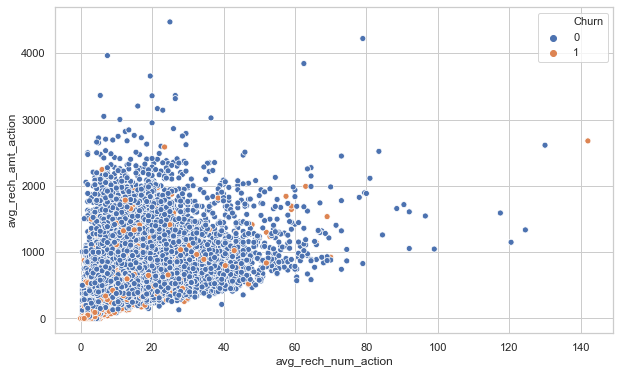

In [59]:
plt.figure(figsize=(10,6))
fig = sns.scatterplot('avg_rech_num_action','avg_rech_amt_action', hue='Churn', data=df_1)

The recharge number and the recharge amount are in propotiona. Higher the number of recharge, Higher is the amount of the recharge


2. Analizing churn rate WRT the decreasing recharge amount and number of recharge during the action phase

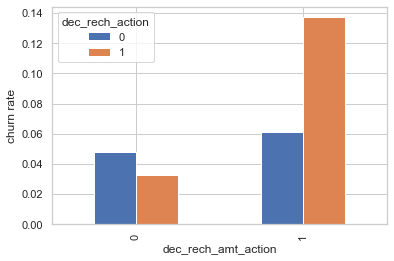

In [60]:
df_1.pivot_table(values='Churn', index='dec_rech_amt_action', columns='dec_rech_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

The churn rate is higher for the customers, whose recharge amount and number of recharge have decreased in the action phase when compared to the good phase.

In [61]:
# Function to create Box Plot for month 6,7 and 8
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    data = df_1
    plt.subplot(2,3,1)
    sns.boxplot(data=data, y=attribute+"_6",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=data, y=attribute+"_7",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=data, y=attribute+"_8",x="Churn",hue="Churn",
                showfliers=False,palette=("plasma"))
    plt.show()

In [62]:
recharge_amnt_columns =  df.columns[df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

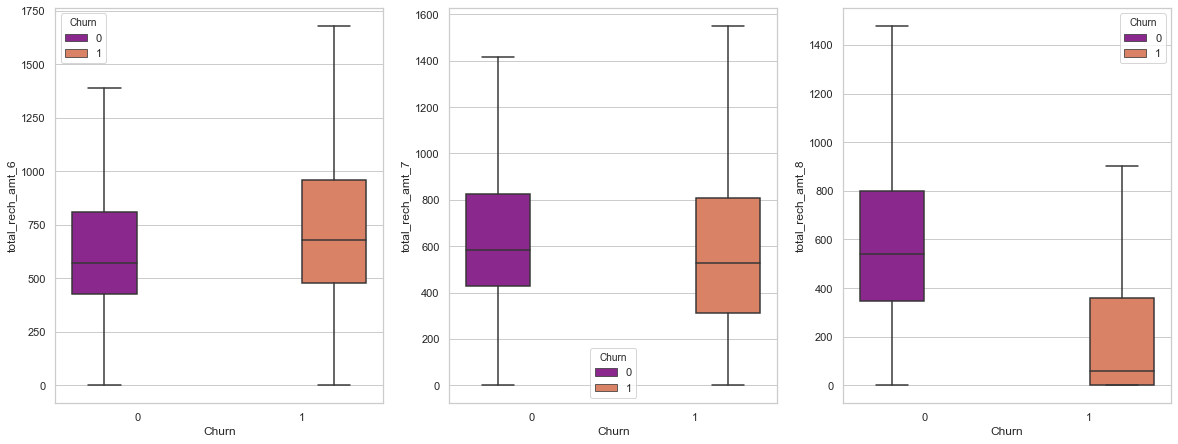

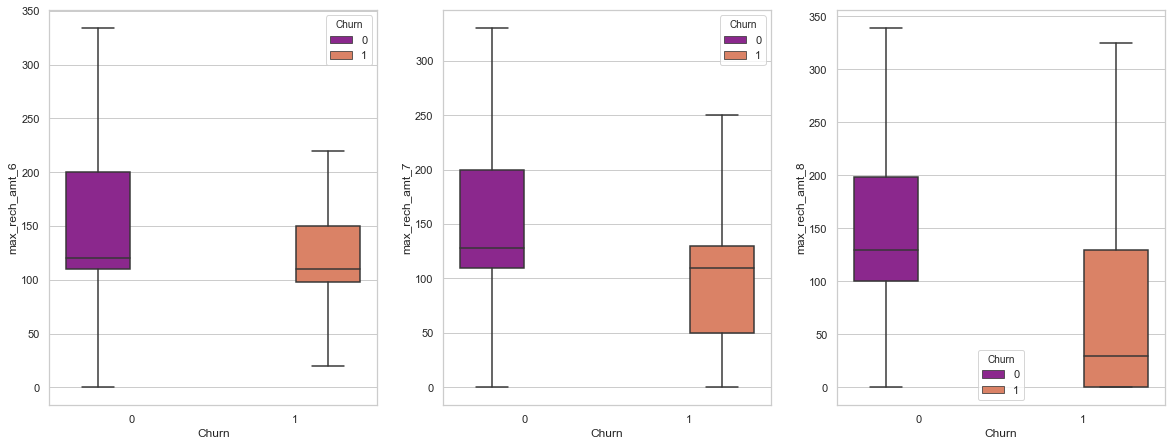

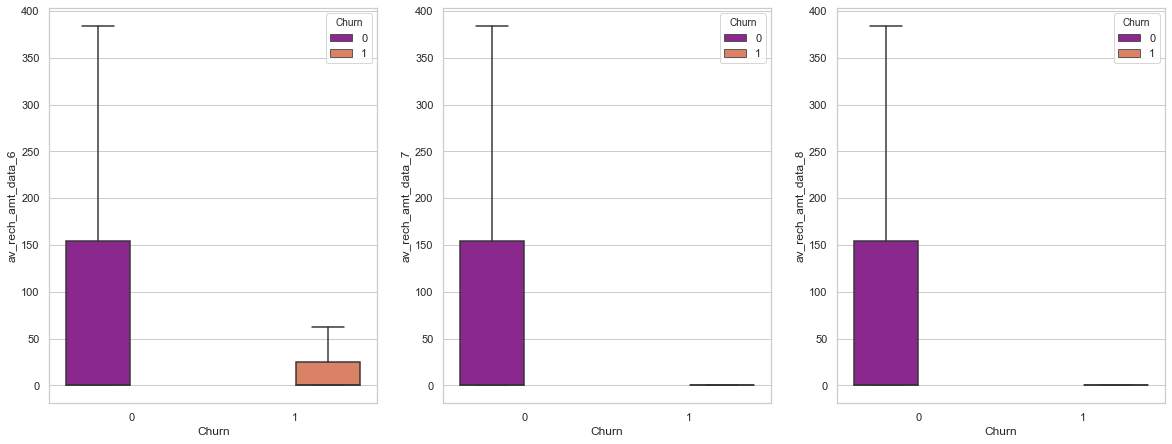

In [63]:
plot_box_chart('total_rech_amt')
plot_box_chart('max_rech_amt')
plot_box_chart('av_rech_amt_data')

***From the above plots we can see clearly that the reacharge amounts (Total & Maximum) started to fall in the month 8 i.e near to the churn phase.***

In [64]:
# Dropping the Some of the Derived columns that are not needed furthur.

df_1= df_1.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_rech_6_7'], axis=1)

In [65]:
#function for box plot

def bx_plot(*args,data): 
    
    m=math.ceil(len(args)/2)  # getting the length f arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 8*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        
        sns.boxplot(col, data, ax=ax_li[i])  # plotting the box plot
        ax_li[i].set_title(col)
        #ax_li[i].set_xscale('log')
        plt.tight_layout()
        i=i+1

In [66]:
# plotting the distribution for recharge amount columns
col_rech = [col for col in df_1.columns if 'rech' in col]
col_rech

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'dec_rech_action',
 'dec_rech_amt_action']

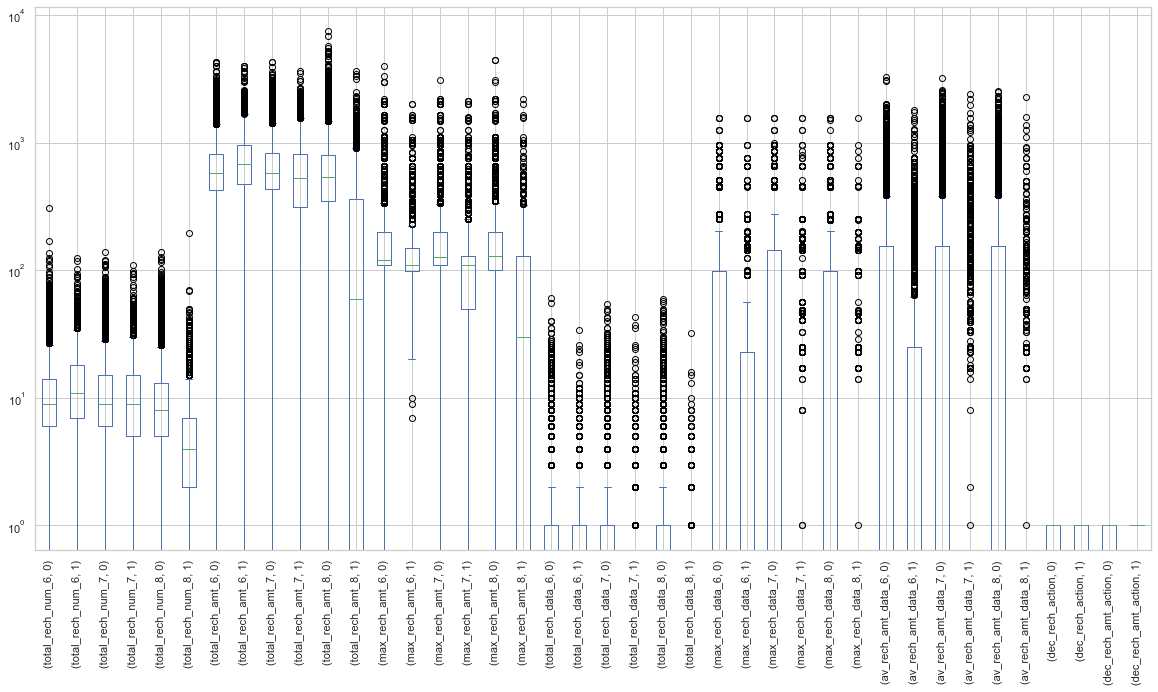

In [67]:
fig,axes = plt.subplots(1,1,squeeze=False, figsize = (20, 10))
ax=axes[0][0]

df_1.pivot(columns='Churn')[col_rech].plot(kind = 'box',ax=ax)

ax.xaxis.set_tick_params(rotation=90)
plt.yscale('log')
 

# Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

# Putting feature variables into X
X = df_1.drop(['Churn'], axis=1)

# Putting target variable to y
y = df_1.pop('Churn')

# Splitting data into train and test set 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100, stratify=y)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20790, 137), (8910, 137), (20790,), (8910,))

Using SMOTE (Synthetic Minority Oversampling Technique) for class imbalance

In [70]:
conda install -c conda-forge imbalanced-learn

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.14.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c conda-forge conda





Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done


In [71]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiating SMOTE
smt = SMOTE(random_state=42)

# Fittign SMOTE to the train set

X_train, y_train = smt.fit_resample(X_train, y_train)

In [72]:
X_train.shape 

(38004, 137)

### **Scaling numeric features**

During EDA we have observed few outliers in numeric features. So, using Robust Scaling using median and quantile values instead of Standard Scaling using mean and standard deviation.

In [73]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

In [74]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
0,"1,409.37","1,052.63","1,674.24",453.28,343.38,589.58,826.99,811.99,815.96,70.83,39.78,121.14,116.76,69.06,228.88,415.74,313.88,457.94,556.73,635.79,627.58,0.00,0.81,2.50,0.00,0.00,0.00,972.48,950.49,"1,088.03",4.68,3.38,1.28,184.41,132.43,86.66,0.00,0.00,0.68,189.09,135.81,88.63,0.00,0.00,0.00,1.93,0.00,0.00,0.00,0.00,0.00,"1,163.51","1,086.31","1,176.66",268.74,346.29,291.99,768.03,733.01,470.96,18.14,11.83,1.44,"1,054.93","1,091.14",764.41,5.59,2.03,0.00,36.28,61.58,55.23,3.15,0.00,5.65,45.03,63.61,60.88,"1,099.96","1,154.76",831.43,0.00,0.00,0.00,0.00,0.00,6.13,0.00,0.00,0.00,14.00,10.00,13.00,"1,760.00","1,048.00","1,970.00",250.00,250.00,250.00,0.00,200.00,130.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"1,791.00",0.00,0.00,0.00,1,1,1,1
1,388.90,533.34,675.71,13.28,11.94,48.51,201.43,230.93,277.83,0.00,0.00,0.00,0.00,0.00,0.00,7.16,8.86,30.91,188.41,219.04,245.49,10.01,0.36,11.81,0.15,0.00,0.00,205.59,228.28,288.23,6.11,3.08,17.59,2.85,6.49,16.98,0.00,0.00,3.53,8.96,9.58,38.11,0.00,0.00,0.00,0.15,5.01,0.00,0.00,0.00,0.00,214.71,242.88,326.34,7.04,5.38,11.56,183.64,600.43,251.44,24.83,71.06,29.36,215.53,676.88,292.38,3.24,4.06,7.86,0.85,4.45,8.91,0.00,0.00,2.31,4.09,8.51,19.09,219.76,685.39,311.48,0.00,0.00,0.00,0.13,0.00,0.00,0.00,0.00,0.00,2.00,6.00,4.00,379.00,532.00,"1,034.00",379.00,250.00,400.00,0.00,27.00,350.00,0.00,1.00,1.00,0.00,145.00,154.00,0.00,145.00,154.00,0.00,1.84,3.87,0.00,478.99,127.33,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,"2,372.00",38.22,114.06,236.82,0,0,0,0
2,19.42,597.25,709.65,3.68,"1,031.28","1,018.29",24.89,927.86,"1,043.43",0.00,0.00,0.00,0.00,0.00,0.00,0.05,3.18,3.24,1.03,16.59,7.04,0.00,0.00,0.00,5.46,0.00,0.00,1.08,19.78,10.29,3.63,"1,028.09","1,015.04",18.39,907.38,"1,028.61",0.00,0.00,0.00,22.03,"1,935.48","2,043.66",0.00,0.00,0.00,5.46,6.21,8.86,0.00,0.00,0.00,28.58,"1,961.48","2,062.83",6.39,1.4

****Scaling the TRAIN data set****

In [75]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
print("Total scalable columns: ", len(cols_scale))
# Removing the derived binary columns 
binary_cols_to_remove=['dec_MOU_action','dec_rech_action','dec_rech_amt_action','dec_avg_revenuePC_action']
for col in binary_cols_to_remove:
    cols_scale.remove(col)

print("Scalable cols after removing : ", len(cols_scale))


Total scalable columns:  137
Scalable cols after removing :  133


In [76]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [77]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
0,2.42,1.62,3.55,0.23,0.11,1.02,0.81,0.89,1.40,0.52,0.29,1.41,0.66,0.38,1.98,1.56,1.16,2.24,1.92,2.47,2.81,-0.31,-0.24,-0.09,-0.22,-0.20,-0.21,2.22,2.31,3.15,-0.53,-0.50,-0.37,-0.16,-0.22,-0.13,-0.15,-0.14,-0.04,-0.48,-0.50,-0.34,-0.12,-0.11,-0.07,-0.25,-0.36,-0.26,-0.36,-0.02,-0.01,0.62,0.65,1.27,1.65,2.02,2.09,2.99,3.07,2.14,0.19,0.01,-0.23,2.98,3.17,2.46,-0.17,-0.20,-0.20,0.04,0.34,0.42,0.06,-0.14,0.29,-0.05,0.14,0.27,2.53,2.76,2.16,-0.36,-0.14,-0.16,-0.18,-0.16,-0.03,-0.09,-0.09,-0.08,0.09,-0.17,0.60,2.66,1.07,3.53,0.60,0.56,0.93,-0.78,0.88,0.59,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,0.80,-0.27,-0.29,-0.29,1,1,1,1
1,-0.60,0.02,0.82,-0.66,-0.62,-0.37,-0.48,-0.35,0.05,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.33,-0.30,-0.13,0.20,0.42,0.77,0.32,-0.27,0.54,-0.20,-0.20,-0.21,-0.07,0.06,0.43,-0.52,-0.50,-0.32,-0.56,-0.51,-0.34,-0.15,-0.14,0.28,-0.76,-0.71,-0.43,-0.12,-0.11,-0.07,-0.35,-0.11,-0.26,-0.36,-0.02,-0.01,-0.78,-0.64,-0.17,-0.38,-0.34,-0.25,0.23,2.40,0.89,0.37,1.53,0.62,0.05,1.72,0.58,-0.21,-0.17,-0.04,-0.33,-0.26,-0.14,-0.14,-0.14,0.05,-0.37,-0.30,-0.12,-0.14,1.33,0.42,-0.36,-0.14,-0.16,-0.17,-0.16,-0.13,-0.09,-0.09,-0.08,-1.13,-0.61,-0.47,-0.80,-0.22,1.39,1.45,0.56,1.99,-0.78,-0.49,2.53,-0.41,0.07,0.18,-0.48,1.01,1.42,-0.45,0.42,0.69,-0.26,-0.24,-0.18,-0.29,0.39,-0.05,-0.29,-0.28,3.36,-0.29,-0.29,-0.28,-0.29,1.78,-0.24,-0.16,-0.15,-0.12,1.45,-0.14,0.05,0.44,0,0,0,0
2,-1.69,0.21,0.91,-0.68,1.61,2.13,-0.85,1.14,1.97,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.36,-0.32,-0.28,-0.67,-0.58,-0.51,-0.31,-0.29,-0.27,0.49,-0.20,-0.21,-0.68,-0.59,-0.51,-0.53,1.96,2.62,-0.53,1.55,2.67,-0.15,-0.14,-0.12,-0.74,2.43,3.51,-0.12,-0.11,-0.07,-0.05,-0.05,0.21,-0.36,-0.02,-0.01,-1.05,1.99,2.76,-0.39,-0.36,-0.25,-0.58,-0.58,-0.41,-0.31,-0.30,-0.27,-0.64,-0.63,-0.44,-0.25,-0.23,-0.20,-0.18,0.35,-0.18,-0.14,-0.14,-0.11,-0.28,0.13,-0.24,-0.70,-0.53,-0.

****Scaling the TEST DATA set****

We do not fit scaler on the TEST data set. We can only transform TEST set.

In [78]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,dec_rech_action,dec_avg_revenuePC_action,dec_rech_amt_action,dec_MOU_action
2722,0.15,0.43,1.03,1.98,2.60,3.37,-0.37,-0.40,-0.22,-0.22,-0.24,-0.24,-0.28,-0.29,-0.29,0.10,-0.18,0.21,-0.05,-0.03,-0.18,-0.28,-0.29,-0.19,-0.22,-0.20,-0.21,0.02,-0.15,0.01,2.11,2.98,3.77,-0.30,-0.35,-0.09,-0.15,-0.14,-0.12,1.27,1.76,2.46,-0.12,-0.11,-0.07,-0.29,-0.12,-0.06,0.15,-0.02,-0.01,1.22,1.57,2.11,0.23,0.12,0.67,-0.43,0.03,-0.34,-0.28,-0.30,-0.23,-0.25,0.04,0.05,0.09,0.58,0.08,0.10,-0.09,-0.04,-0.14,-0.14,-0.11,0.10,0.20,-0.01,-0.19,0.10,0.01,-0.36,-0.14,-0.16,-0.06,-0.07,-0.12,-0.09,-0.09,-0.08,-0.52,-0.39,0.13,0.35,0.57,1.18,-0.25,-0.17,0.22,0.18,0.31,0.76,-0.41,-0.40,-0.36,-0.48,-0.46,-0.41,-0.45,-0.44,-0.38,-0.26,-0.24,-0.20,-0.29,-0.29,-0.25,-0.29,-0.28,-0.24,-0.29,-0.29,-0.28,-0.29,-0.29,-0.24,-0.16,-0.15,-0.12,-0.70,-0.27,-0.29,-0.29,0,0,0,0
28720,-0.90,-0.54,0.87,-0.63,-0.49,-0.23,-0.54,-0.39,-0.13,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.24,-0.01,0.28,0.12,0.35,0.51,-0.10,-0.29,-0.25,-0.22,-0.20,-0.21,-0.08,0.20,0.48,-0.54,-0.51,-0.38,-0.56,-0.52,-0.36,-0.15,0.03,-0.08,-0.77,-0.71,-0.49,-0.12,-0.11,-0.07,-0.36,-0.36,-0.26,-0.36,-0.02,-0.01,-0.79,-0.58,-0.19,-0.25,0.04,0.84,0.70,0.84,1.27,-0.31,-0.30,-0.27,0.36,0.57,1.25,-0.26,-0.23,-0.20,-0.29,-0.27,-0.20,-0.14,-0.14,-0.03,-0.37,-0.34,-0.25,0.14,0.32,0.93,-0.36,-0.14,-0.16,-0.18,-0.16,-0.13,-0.09,-0.09,-0.08,0.09,0.69,0.84,-0.94,-0.50,0.86,-0.84,-0.76,1.46,-0.54,-0.47,-0.30,3.09,3.82,2.85,-0.22,-0.20,1.31,0.63,0.81,0.45,2.34,-0.01,-0.18,-0.29,1.90,1.89,-0.29,-0.28,-0.24,4.25,0.90,0.42,-0.29,-0.29,2.06,-0.16,8.07,5.19,1.88,1.39,-0.09,-0.29,0,0,0,0
43175,0.44,0.09,0.55,1.77,2.28,2.71,-0.67,-0.57,-0.35,-0.22,-0.24,-0.24,-0.28,-0.30,-0.29,-0.19,-0.28,-0.24,-0.52,-0.60,-0.38,-0.24,-0.18,-0.27,-0.22,-0.20,-0.21,-0.47,-0.57,-0.40,2.03,2.67,3.26,-0.40,-0.33,-0.15,-0.15,-0.14,-0.12,1.14,1.57,2.07,-0.12,-0.11,-0.07,-0.06,1.51,0.27,3.35,-0.02,-0.01,0.87,1.24,1.59,0.17,-0.02,0.58,-0.33,-0.38,-0.10,1.08,0.82,0.80,-0.03,-0.16,0.31,-0.12,0.29,0.31,-0.33,-0.30,-0.24,-0.07,-0.12,-0.11,-0.32,-0.10,-0.

# Model building with PCA(Principal Component Analysis)

In [79]:
#Import PCA
from sklearn.decomposition import PCA

# Instantiate PCA
pca = PCA(svd_solver='randomized', random_state=100)

# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=100, svd_solver='randomized')

In [80]:
# Looking at the Principal components
pca.components_

array([[ 3.43816642e-02,  1.11902296e-01,  1.55459988e-01, ...,
        -3.32521563e-02, -3.36223735e-02, -2.93010553e-02],
       [ 6.22345033e-02,  1.17774181e-01,  1.04064177e-01, ...,
        -1.30651108e-02, -1.25691901e-02, -5.84779464e-03],
       [ 5.60397985e-02,  1.61155033e-01,  1.43011394e-01, ...,
        -3.27725102e-02, -3.47598333e-02, -3.35399624e-02],
       ...,
       [-2.64506996e-16, -5.80572514e-17, -2.14570713e-16, ...,
         1.37927404e-16, -6.40681196e-17, -2.29337747e-16],
       [ 0.00000000e+00,  1.20661525e-16,  6.71926656e-17, ...,
        -1.66421818e-16,  1.26627224e-16,  4.00865315e-17],
       [ 0.00000000e+00, -6.35402556e-17,  4.29376977e-17, ...,
        -3.12566286e-16, -1.22737990e-16,  1.16712663e-16]])

In [81]:
# Cumuliative varinace of the principal components.
variance_cumu = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
print(variance_cumu)

[ 10.4176  18.6791  25.0507  29.2913  33.3786  37.1281  40.4399  43.2009
  45.626   48.0124  50.1358  52.2197  54.2908  56.2503  58.028   59.7345
  61.4051  62.8665  64.2597  65.6203  66.8989  68.1094  69.2909  70.3862
  71.453   72.4519  73.4217  74.3208  75.2094  76.0738  76.8851  77.6793
  78.447   79.1978  79.935   80.6653  81.3731  82.0587  82.7168  83.3691
  83.9925  84.5839  85.1353  85.6517  86.1623  86.6547  87.1323  87.5715
  88.0049  88.4211  88.8251  89.2253  89.6063  89.9808  90.352   90.7147
  91.066   91.4063  91.7417  92.0709  92.3949  92.6955  92.9827  93.2658
  93.5309  93.7906  94.0425  94.2865  94.5296  94.7652  94.9989  95.2299
  95.4527  95.6675  95.8783  96.0862  96.2902  96.4903  96.6862  96.8793
  97.0669  97.2522  97.4243  97.5957  97.7619  97.9265  98.0882  98.232
  98.3679  98.5016  98.6316  98.7599  98.8817  98.9974  99.1037  99.1983
  99.2912  99.3775  99.4606  99.5376  99.6103  99.6763  99.7401  99.8013
  99.8481  99.885   99.9181  99.9476  99.9727  99.99

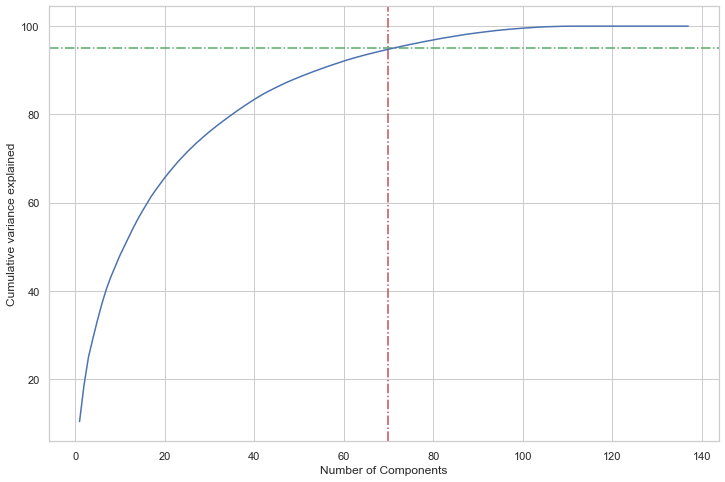

In [82]:
# # Plotting scree plot
fig = plt.figure(figsize=[12,8])
plt.axhline(y=95, color='g', linestyle='-.')
plt.axvline(x=70, color='r', linestyle='-.')
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel("Cumulative variance explained")
plt.show()

From the graph, 70 components  describe 95% of the variance in the dataset, so 70 components is the threshold value

**Using incremental PCA for better efficiency**

In [83]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components = 70)

X_train_pca = pca_final.fit_transform(X_train)

In [84]:
print("Size of earlier dataset was :",X_train.shape)
print("Size of dataset after PCA is:", X_train_pca.shape)

Size of earlier dataset was : (38004, 137)
Size of dataset after PCA is: (38004, 70)


In [85]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(X_train_pca.transpose())

#Make a diagonal matrix with diagonal entry of Matrix corrmat
p = np.diagflat(corrmat.diagonal())

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max positive corr:",round(corrmat_diag_zero.max(),3), ", min negative corr: ", round(corrmat_diag_zero.min(),3))

max positive corr: 0.016 , min negative corr:  -0.017


There is no correlation among the attributes so these principal components can be considered

*Applying transformation on the test set*




In [86]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8910, 70)

     *********************************************************************               

# MODEL BUILDING

Now we build models based on this PCA transformed dataset to predict customer churn

## 1. Logistic regression with PCA

In [87]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [88]:
# default solver is very slow so changed to 'lbfgs'
logreg = LogisticRegression(solver = 'lbfgs',class_weight="balanced")

In [89]:
# Training the model on the data
logreg.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [90]:
#prediction on test data
y_pred = logreg.predict(X_test_pca)

#create confusion matrix
cm = confusion_matrix(y_test,y_pred)
print("confusoin matrix \t\n",cm)

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

#check area under the curve
from sklearn.metrics import roc_auc_score
print("area under the curve \t",round(roc_auc_score(y_test,y_pred),2))

confusoin matrix 	
 [[6696 1447]
 [ 139  628]]
sensitivity 	 0.82
specificity 	 0.82
area under the curve 	 0.82


***Tuning hyperparameter C***


C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [91]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [92]:

# Creating StratifiedKFold object with 5 splits
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# GridSearch
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [93]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.22,0.02,0.01,0.01,0.01,{'C': 0.01},0.91,0.91,0.91,0.90,0.91,0.91,0.00,6,0.91,0.91,0.91,0.91,0.91,0.91,0.00
1,0.27,0.02,0.01,0.01,0.10,{'C': 0.1},0.91,0.91,0.91,0.90,0.91,0.91,0.00,5,0.91,0.91,0.91,0.91,0.91,0.91,0.00
2,0.29,0.02,0.01,0.01,1,{'C': 1},0.91,0.91,0.91,0.90,0.91,0.91,0.00,4,0.91,0.91,0.91,0.91,0.91,0.91,0.00
3,0.30,0.02,0.01,0.01,10,{'C': 10},0.91,0.91,0.91,0.90,0.91,0.91,0.00,3,0.91,0.91,0.91,0.91,0.91,0.91,0.00
4,0.29,0.01,0.01,0.01,100,{'C': 100},0.91,0.91,0.91,0.90,0.91,0.91,0.00,2,0.91,0.91,0.91,0.91,0.91,0.91,0.00
5,0.29,0.01,0.01,0.01,1000,{'C': 1000},0.91,0.91,0.91,0.90,0.91,0.91,0.00,1,0.91,0.91,0.91,0.91,0.91,0.91,0.00


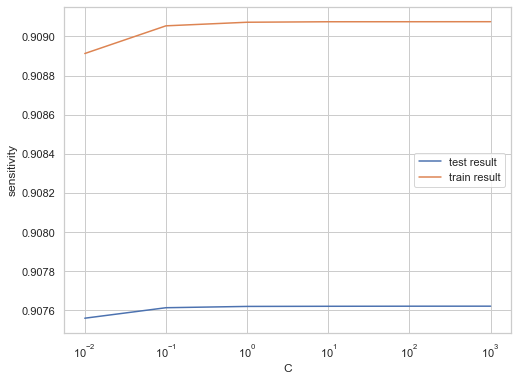

In [94]:
 # plotting C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

In [95]:

# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.9076219498149272 at C = 1000


**MODEL WITH OPTIMUM Paramaters**

In [96]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set

In [97]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

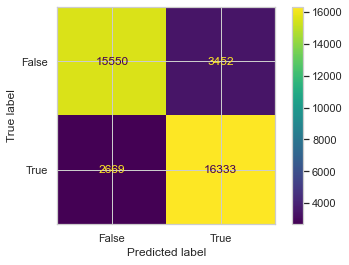

In [98]:
## Confusion Matrix.

actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()  

In [99]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

In [100]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# Recall
print("Recall:-" , TP/float(TP+FN))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_train_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob),2))



Accuracy:- 0.8389380065256289
Sensitivity:- 0.8595411009367435
Specificity:- 0.8183349121145143
Recall:- 0.8595411009367435
AUC:    	 0.91


**Prediction on the test set**

In [101]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

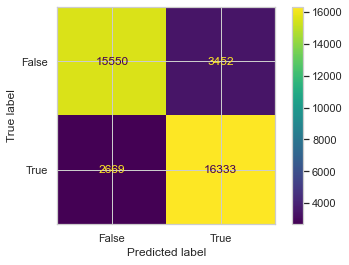

In [102]:
# Confusion matrix
actual = np.random.binomial(1,.9,size = 1000)
predicted = np.random.binomial(1,.9,size = 1000)

confusion = metrics.confusion_matrix(y_test, y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

In [103]:
# Accuracy
print("Accuracy:-    \t",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-  \t",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-  \t", round(TN / float(TN+FP),2))

# Recall
print("Recall:-    \t" , round(TP/float(TP+FN),2))

# check area under curve
y_pred_prob = log_pca_model.predict_proba(X_test_pca)[:, 1]
print("AUC:-    \t", round(roc_auc_score(y_test, y_pred_prob),2))

Accuracy:-    	 0.82
Sensitivity:-  	 0.86
Specificity:-  	 0.82
Recall:-    	 0.86
AUC:-    	 0.89


The model is performing well in the TEST set, as per what it has learned from the TRAIN set.

*******************************************************************************************************************************************************************************************************************************

## 2. Decision tree with PCA

In [104]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

**Hyperparameter tuning**

In [105]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model for best results.
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [106]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.88,0.67,0.01,0.01,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,7
1,4.45,0.65,0.01,0.01,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,7
2,3.64,0.38,0.01,0.01,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,5
3,3.07,0.09,0.00,0.01,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.79,0.80,0.83,0.84,0.80,0.81,0.02,5
4,5.43,0.21,0.00,0.00,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}",0.83,0.84,0.85,0.85,0.83,0.84,0.01,1
5,5.60,0.21,0.01,0.01,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}",0.83,0.84,0.85,0.85,0.83,0.84,0.01,2
6,5.08,0.27,0.01,0.01,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 50}",0.82,0.85,0.84,0.83,0.83,0.83,0.01,3
7,5.08,0.17,0.00,0.00,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 100}",0.82,0.85,0.84,0.83,0.83,0.83,0.01,3


In [107]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.8401212977194368
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


**Model with optimal hyperparameters**

In [108]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=10)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=10,
                       random_state=100)

**Prediction on the train set**

In [109]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)


# Creating Confusion matrix

confusion=metrics.confusion_matrix(y_train, y_train_pred)
confusion

array([[16521,  2481],
       [ 2382, 16620]], dtype=int64)

In [110]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [111]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_train, y_train_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_train, y_train_pred),2))

Accuracy:- 0.87
Sensitivity:- 0.87
Specificity:- 0.87
Recall:- 0.87
Area under curve is: 0.87


**Prediction on the test set**

In [112]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [113]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6903 1240]
 [ 229  538]]


In [114]:
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, y_test_pred),2))

# Sensitivity
print("Sensitivity:-",round(TP / float(TP+FN),2))

# Specificity
print("Specificity:-", round(TN / float(TN+FP),2))

# Recall
print("Recall:-" , round(TP/float(TP+FN),2))

# AUC
print("Area under curve is:", round(metrics.roc_auc_score(y_test, y_test_pred),2))

Accuracy:- 0.84
Sensitivity:- 0.87
Specificity:- 0.87
Recall:- 0.87
Area under curve is: 0.77


In [115]:
# from sklearn.metrics import classification_report,confusion_matrix
# y_pred = dt_pca_model.predict(X_test_pca)
# print(classification_report(y_test, y_pred))

**Model summary** (Decesion Trees with PCA)

-  `Train set`
  * Accuracy = 0.87
  * Sensitivity = 0.89
  * Specificity = 0.86
  * roc_auc_score= 0.87
-  `Test set`
  * Accuracy = 0.83
  * Sensitivity = 0.89
  * Specificity = 0.86
  * roc_auc_score= 0.77

 Sesitivity and Specificity are same while evaluating the model on the test set and Train Set and the accuracy also remained close.


*******************************************************************************************************************************************************************************************************************************

## 3. Random forest with PCA

In [116]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [118]:
# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [119]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [120]:
# Checking the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      8143
           1       0.47      0.52      0.50       767

    accuracy                           0.91      8910
   macro avg       0.71      0.73      0.72      8910
weighted avg       0.91      0.91      0.91      8910



In [121]:
# Printing confusion matrix
confusion=metrics.confusion_matrix(y_test,predictions)
confusion

array([[7695,  448],
       [ 367,  400]], dtype=int64)

In [122]:
print(accuracy_score(y_test,predictions))

0.9085297418630752


High accuracy rate reflects good model

Hyperparameter Tuning

***Tuning max_depth***

Deriving the optimum values for max_depth and its effect on the overall accuracy of the ensemble.


In [123]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier(class_weight= 'balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, 
                   scoring="accuracy",verbose =1, n_jobs = -1, return_train_score=True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.9419007679045002
{'max_depth': 17}


In [124]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,25.87,0.52,0.18,0.03,2,{'max_depth': 2},0.78,0.80,0.79,0.79,0.79,0.79,0.01,4,0.80,0.79,0.79,0.79,0.79,0.79,0.00
1,87.74,1.08,0.23,0.05,7,{'max_depth': 7},0.85,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,152.54,2.65,0.27,0.06,12,{'max_depth': 12},0.92,0.92,0.92,0.92,0.91,0.92,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,155.28,18.19,0.20,0.01,17,{'max_depth': 17},0.94,0.94,0.94,0.94,0.94,0.94,0.00,1,0.99,0.99,0.99,0.99,0.99,0.99,0.00


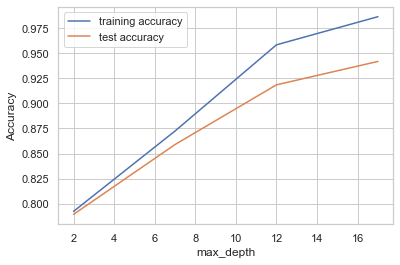

In [125]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the value of max_depth increases, both train and test scores increase till a point.It reflects overfitting

The depth of the trees can be altered toreduce overfitting.

***Tuning n_estimators***

n_estimator impacts the overall accuracy. 



In [126]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 500)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4, class_weight ='balanced', random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, verbose = 1,
                   scoring="accuracy",return_train_score=True, n_jobs = -1)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8210978091525354
{'n_estimators': 1100}


In [127]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,49.27,0.79,0.14,0.01,100,{'n_estimators': 100},0.81,0.83,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
1,327.70,1.18,0.75,0.06,600,{'n_estimators': 600},0.81,0.83,0.82,0.82,0.82,0.82,0.01,2,0.83,0.82,0.82,0.82,0.82,0.82,0.00
2,499.98,62.86,0.90,0.19,1100,{'n_estimators': 1100},0.81,0.83,0.82,0.82,0.82,0.82,0.01,1,0.83,0.82,0.82,0.82,0.82,0.82,0.00


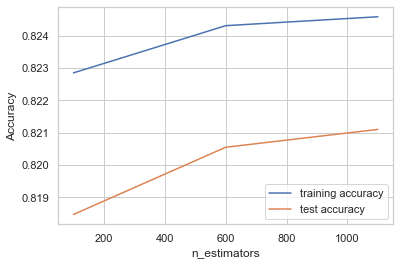

In [128]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Tuning max_features

The 'max_features' considered for splitting at a node.

In [129]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4,class_weight='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,cv=n_folds, 
                   scoring="accuracy",n_jobs = -1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8242553334395059
{'max_features': 14}


In [130]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,62.25,0.32,0.21,0.04,4,{'max_features': 4},0.80,0.82,0.81,0.81,0.81,0.81,0.01,5,0.82,0.81,0.81,0.81,0.82,0.81,0.00
1,81.00,16.67,0.19,0.04,8,{'max_features': 8},0.81,0.83,0.82,0.82,0.82,0.82,0.01,3,0.82,0.82,0.82,0.82,0.82,0.82,0.00
2,96.13,3.35,0.14,0.01,14,{'max_features': 14},0.82,0.83,0.82,0.83,0.82,0.82,0.00,1,0.83,0.83,0.83,0.83,0.83,0.83,0.00
3,128.78,1.62,0.13,0.04,20,{'max_features': 20},0.81,0.82,0.81,0.82,0.82,0.82,0.01,4,0.82,0.82,0.82,0.82,0.82,0.82,0.00
4,132.58,14.59,0.08,0.02,24,{'max_features': 24},0.81,0.83,0.82,0.82,0.82,0.82,0.00,2,0.82,0.82,0.82,0.82,0.82,0.82,0.00


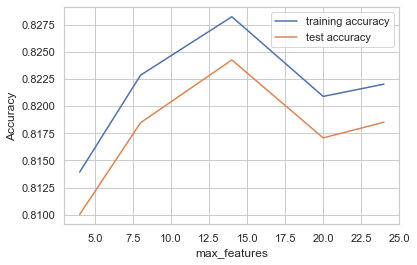

In [131]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


***Tuning min_samples_leaf***

The hyperparameter min_samples_leaf denotes the minimum number of samples required to be at a leaf node:
- In case of int, min_samples_leaf is the minimum number.
- In case of float, min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [132]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight ='balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",verbose =1, return_train_score = True, n_jobs = -1)
rf.fit(X_train_pca, y_train)
print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8536996032378011
{'min_samples_leaf': 100}


In [133]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,112.12,1.24,0.21,0.02,100,{'min_samples_leaf': 100},0.84,0.86,0.86,0.86,0.85,0.85,0.01,1,0.87,0.86,0.87,0.86,0.87,0.86,0.00
1,102.53,1.68,0.21,0.04,150,{'min_samples_leaf': 150},0.83,0.85,0.85,0.85,0.84,0.84,0.01,2,0.85,0.85,0.85,0.85,0.85,0.85,0.00
2,97.64,1.31,0.20,0.01,200,{'min_samples_leaf': 200},0.83,0.84,0.84,0.84,0.84,0.84,0.01,3,0.85,0.84,0.85,0.84,0.85,0.85,0.00
3,91.48,0.91,0.21,0.03,250,{'min_samples_leaf': 250},0.82,0.84,0.84,0.84,0.83,0.83,0.01,4,0.84,0.84,0.84,0.84,0.84,0.84,0.00
4,84.50,4.37,0.19,0.05,300,{'min_samples_leaf': 300},0.82,0.84,0.83,0.84,0.83,0.83,0.01,5,0.84,0.83,0.84,0.84,0.84,0.84,0.00


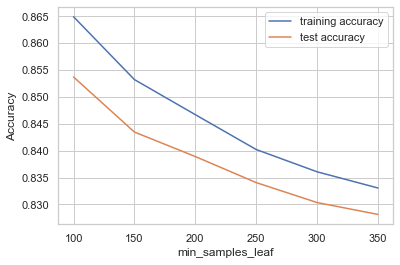

In [134]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

As the value of min_samples_leaf decreases, overfitting increases

 min_samples_split Tuning

Checking the performance of the ensemble

In [135]:

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier(class_weight = 'balanced',random_state=100)


# fit tree on training data
rf = GridSearchCV(rf, parameters, verbose = 1,
                    cv=n_folds, 
                   scoring="accuracy",n_jobs =-1, return_train_score = True)
rf.fit(X_train_pca, y_train)

print(rf.best_score_)
print(rf.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8694348389062381
{'min_samples_split': 200}


In [136]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,223.45,6.22,0.34,0.03,200,{'min_samples_split': 200},0.86,0.88,0.87,0.87,0.87,0.87,0.01,1,0.89,0.89,0.89,0.89,0.89,0.89,0.00
1,197.35,21.30,0.29,0.05,250,{'min_samples_split': 250},0.85,0.87,0.86,0.86,0.86,0.86,0.01,2,0.88,0.88,0.88,0.88,0.88,0.88,0.00
2,162.94,2.79,0.23,0.01,300,{'min_samples_split': 300},0.84,0.86,0.86,0.86,0.86,0.86,0.01,3,0.87,0.87,0.87,0.87,0.88,0.87,0.00
3,159.14,1.66,0.21,0.02,350,{'min_samples_split': 350},0.84,0.86,0.85,0.86,0.85,0.85,0.01,4,0.87,0.87,0.87,0.87,0.87,0.87,0.00
4,152.48,11.47,0.27,0.08,400,{'min_samples_split': 400},0.84,0.86,0.85,0.85,0.85,0.85,0.01,5,0.86,0.86,0.86,0.86,0.86,0.86,0.00


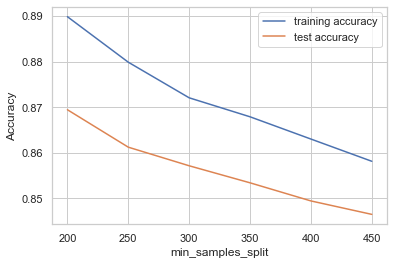

In [137]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Finding the optimal hyperparameters using GridSearchCV.

In [138]:
# Create the parameter grid based on the results of random search  
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [139]:
# Fitting the grid search to the data

grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters

print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

In [141]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,class_weight = 'balanced',
                             max_depth=grid_search.best_params_['max_depth'],
                             min_samples_split=grid_search.best_params_['min_samples_split'],
                             max_features=grid_search.best_params_['max_features'],
                             n_estimators =grid_search.best_params_['n_estimators'],
                             random_state=100, oob_score=True)

In [142]:
# fitting the Model
rfc.fit(X_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_split=200, n_estimators=200, oob_score=True,
                       random_state=100)

In [143]:
# predicting using test data

predictions = rfc.predict(X_test_pca)

In [144]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93      8143
           1       0.37      0.71      0.49       767

    accuracy                           0.87      8910
   macro avg       0.67      0.80      0.71      8910
weighted avg       0.92      0.87      0.89      8910



In [145]:
rfc.oob_score_

0.8662246079360068

In [146]:
#create confusion matrix
cm = metrics.confusion_matrix(y_test,predictions)
print("confusoin matrix \t\n",cm)
# Accuracy
print("Accuracy:-",round(metrics.accuracy_score(y_test, predictions),2))

#checking sesitivity 
print("sensitivity \t", (cm[1,1]/(cm[1,0]+cm[1,1])).round(2))


#checking  specificity
print("specificity \t", (cm[0,0]/(cm[0,0]+cm[0,1])).round(2))

# check area under curve
y_pred_prob = rfc.predict_proba(X_test_pca)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2)) 

confusoin matrix 	
 [[7228  915]
 [ 222  545]]
Accuracy:- 0.87
sensitivity 	 0.71
specificity 	 0.89
AUC:    	 0.88


Model inference

  * Accuracy =    0.87
  * Sensitivity = 0.70
  * Specificity = 0.89
  * AUC Score =   0.88

****************************************************************************************************************************************************************************

# BUSINESS INSIGHT AND STRATEGIES TO BE EMPLOYED



1. Average revenue per customer in the 7th month was the deciding factor for the churn rate. A sharp decline  indicated the customer might churn.

2. Toal minutes of usage for outgoing is also an important churn predictor.

3. Incoming and outgoing Roaming Minutes of usage also impacts churn.

4. The outgoing Local Minutes of usage are very crucial features on the customer churn.

5. In the 8th month which is the Action Phase, there was a considerable drop in recharge
 

Strategies

 - Telecom company should offer special packages to high valued clients on roaming rates/STD and ISD calling/ Recharge amount spent to improve retention 
 - Customer satisfaction surveys to be done from time to time.
 - Provide discounts on recharge during the action phase 
